In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("spam.csv", encoding='latin-1')  # Ensure correct encoding if there are special characters

# Rename the columns to be more intuitive
data = data.rename(columns={"v1": "Label", "v2": "Message"})

# Preprocessing
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary
X = data['Message']
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 1. Naive Bayes Classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)
y_pred_nb = naive_bayes.predict(X_test_tfidf)

# Evaluate Naive Bayes
print("Naive Bayes Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# 2. Support Vector Machines (SVM) Classifier
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluate SVM
print("\nSupport Vector Machines Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Naive Bayes Classifier Results:
Accuracy: 0.9754784688995215
Confusion Matrix:
 [[1453    0]
 [  41  178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       1.00      0.81      0.90       219

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672


Support Vector Machines Classifier Results:
Accuracy: 0.9796650717703349
Confusion Matrix:
 [[1449    4]
 [  30  189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.86      0.92       219

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



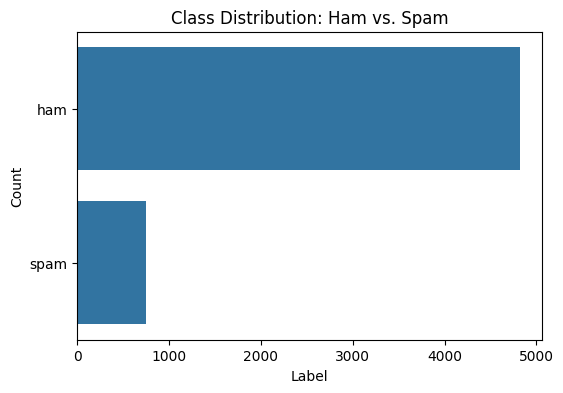

Naive Bayes Classifier Results:
Accuracy: 0.9754784688995215
Confusion Matrix:
 [[1453    0]
 [  41  178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       1.00      0.81      0.90       219

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



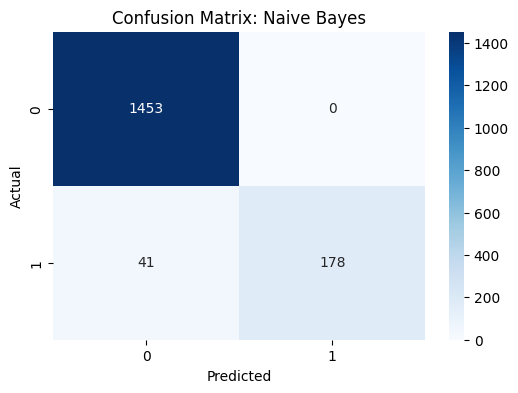


Support Vector Machines Classifier Results:
Accuracy: 0.9796650717703349
Confusion Matrix:
 [[1449    4]
 [  30  189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.86      0.92       219

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



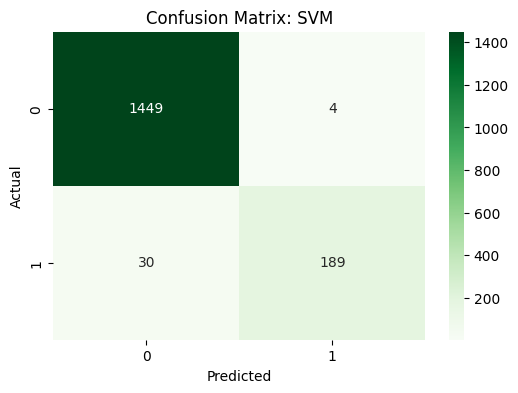

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("spam.csv", encoding='latin-1')

# Rename the columns to be more intuitive
data = data.rename(columns={"v1": "Label", "v2": "Message"})

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['Label'])
plt.title("Class Distribution: Ham vs. Spam")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Preprocessing
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary
X = data['Message']
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 1. Naive Bayes Classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)
y_pred_nb = naive_bayes.predict(X_test_tfidf)

# Evaluate Naive Bayes
print("Naive Bayes Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix Heatmap for Naive Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Support Vector Machines (SVM) Classifier
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluate SVM
print("\nSupport Vector Machines Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix Heatmap for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
